In [18]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# scipy for algorithms
import scipy
from scipy import stats

# pymc3 for Bayesian Inference, pymc built on t
import pymc3
import theano.tensor as tt
import scipy
from scipy import optimize

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib
plt.style.use("ggplot")

In [19]:
raw_data = pd.read_csv('data/lamp_TTF.csv')
duration = raw_data['Projection Hours']

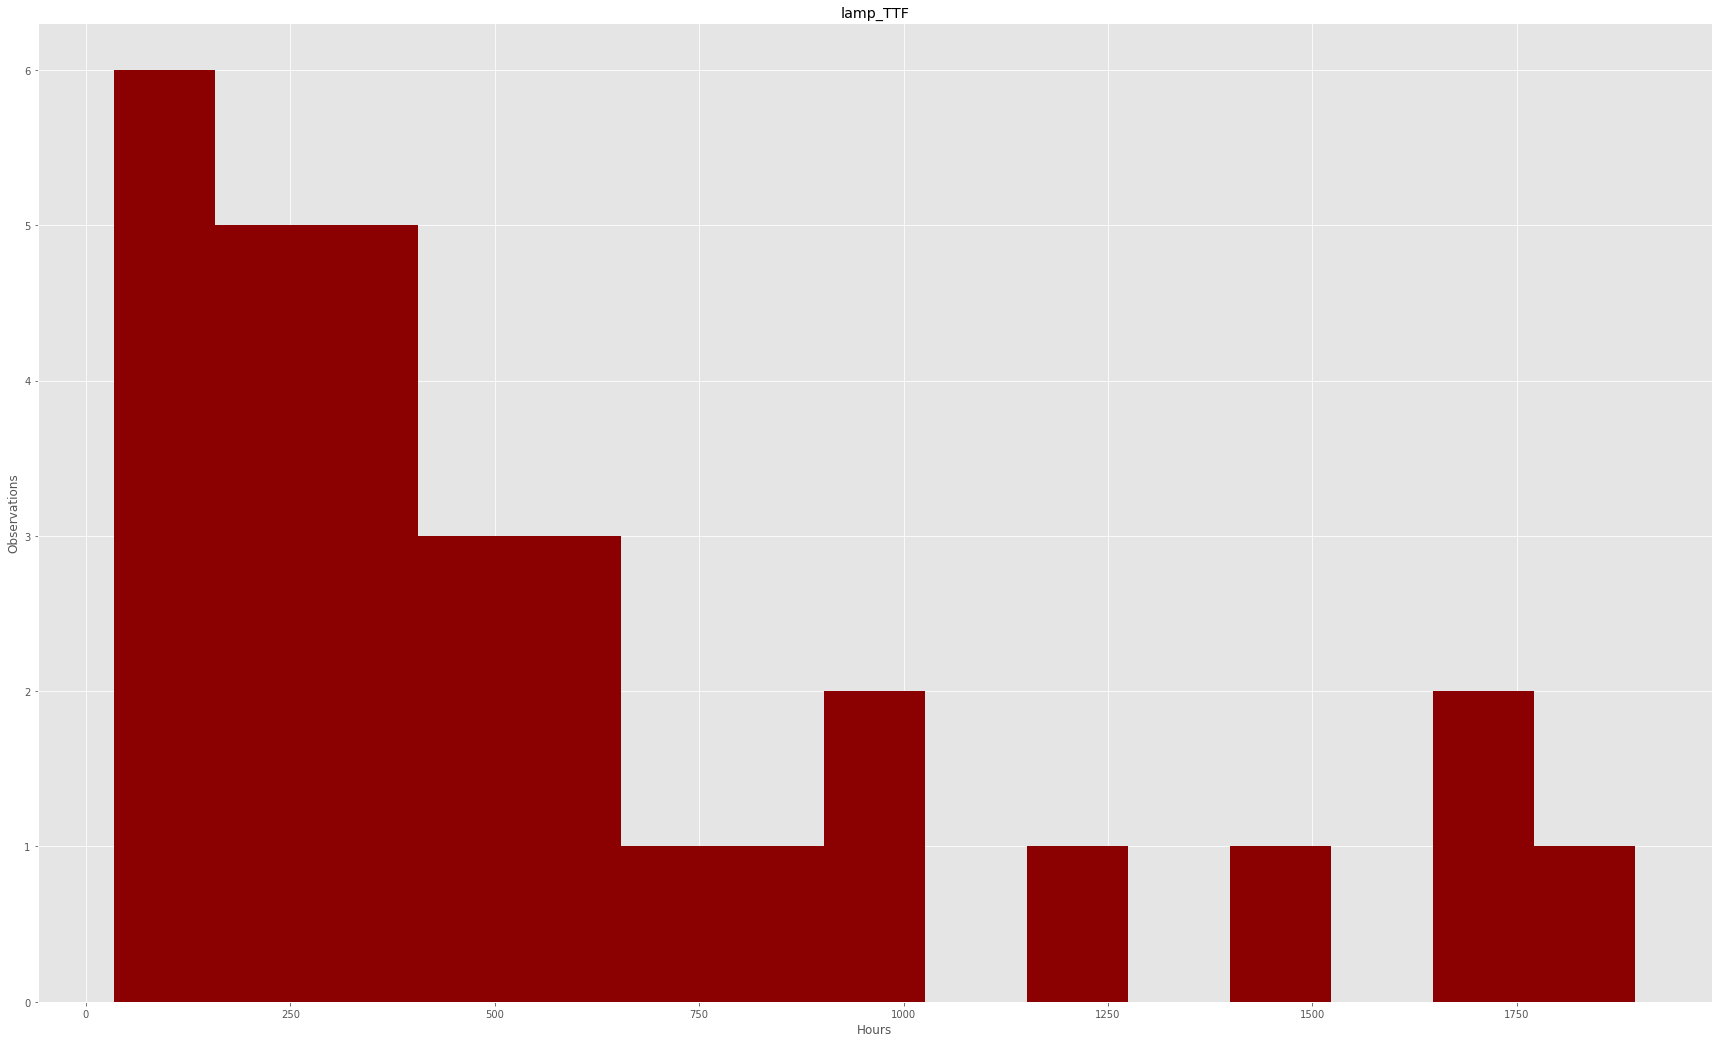

In [26]:
figsize(30, 18)
plt.hist(duration, bins = 15, color = 'darkred')
plt.xlabel('Hours'); plt.title('lamp_TTF'); 
plt.ylabel('Observations');

C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


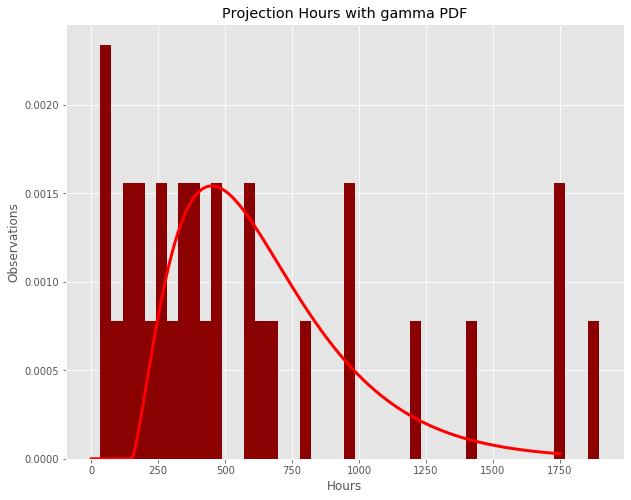

In [21]:
a = 2.5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1750, 2000)

figsize(30, 18)
plt.hist(duration, bins = 45, color = 'darkred', normed=True)
plt.xlabel('Hours'); plt.title('Projection Hours with gamma PDF'); 
plt.ylabel('Observations');
plt.plot(x, stats.gamma.pdf(x, a, loc = 150, scale=200), 'r-', 
         lw=3, label='Gamma pdf');

In [22]:
# Parameter values for prior and analytic posterior
alpha = 2.5
beta = 2350
alpha1 = 1
beta1 = 1
# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 10000

# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the failure rate lamda using a Gamma distribution
    alpha  = pymc3.Gamma("alpha", alpha=alpha, beta=beta)
    beta = pymc3.Gamma("beta", alpha=alpha1, beta=beta1)

    # Define the Weibull likelihood function
    y = pymc3.Weibull("y", alpha=alpha, beta=beta)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the NUTS algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.NUTS()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

logp = -255.67, ||grad|| = 1.4167: 100%|███████████████████████████████████████████████| 9/9 [00:00<00:00, 1061.49it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y, beta, alpha]
Sampling 4 chains, 17,743 divergences: 100%|█████████████████████████████████| 42000/42000 [00:51<00:00, 808.55draws/s]
There were 4510 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4350 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4480 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4400 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [27]:
# Extract the alpha and beta samples and calculate the mean T∼ Weibull(λ, β)
alpha_samples = trace["alpha"][5000:, None]
beta_samples = trace["beta"][5000:, None]
alpha_est = alpha_samples.mean()
beta_est = beta_samples.mean()
print("mean alpha (failure rate) estimate",alpha_est)
print("mean beta estimate",beta_est)

mean alpha (failure rate) estimate 0.0013659919224450457
mean beta estimate 1.0177861804725634


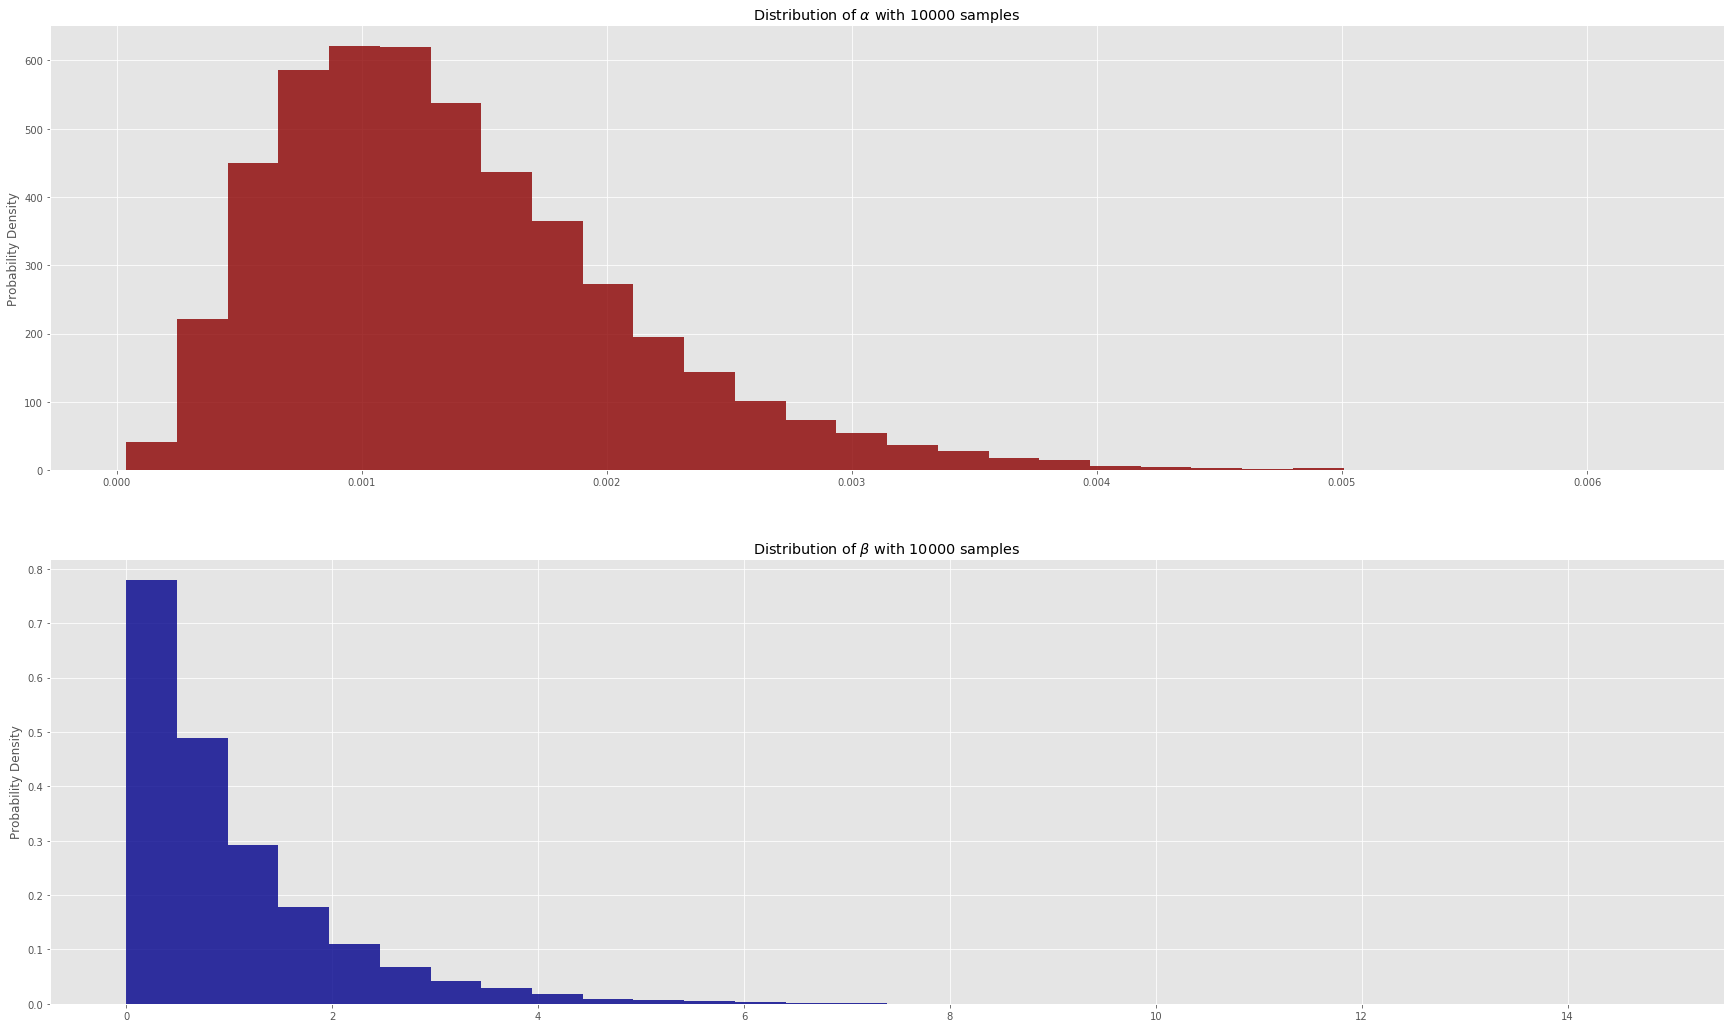

In [24]:
# Visualize Posteriors for $\beta$ and $\alpha$
plt.subplot(211)
plt.title(r"""Distribution of $\alpha$ with %d samples""" % iterations)

plt.hist(alpha_samples, histtype='stepfilled', 
         color = 'darkred', bins=30, alpha=0.8, density=True);
plt.ylabel('Probability Density')
plt.subplot(212)
plt.title(r"""Distribution of $\beta$ with %d samples""" % iterations)
plt.hist(beta_samples, histtype='stepfilled', 
         color = 'darkblue', bins=30, alpha=0.8, density=True)
plt.ylabel('Probability Density');

C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be 

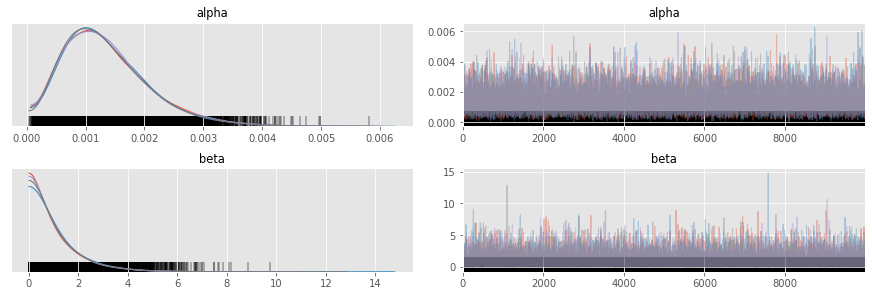

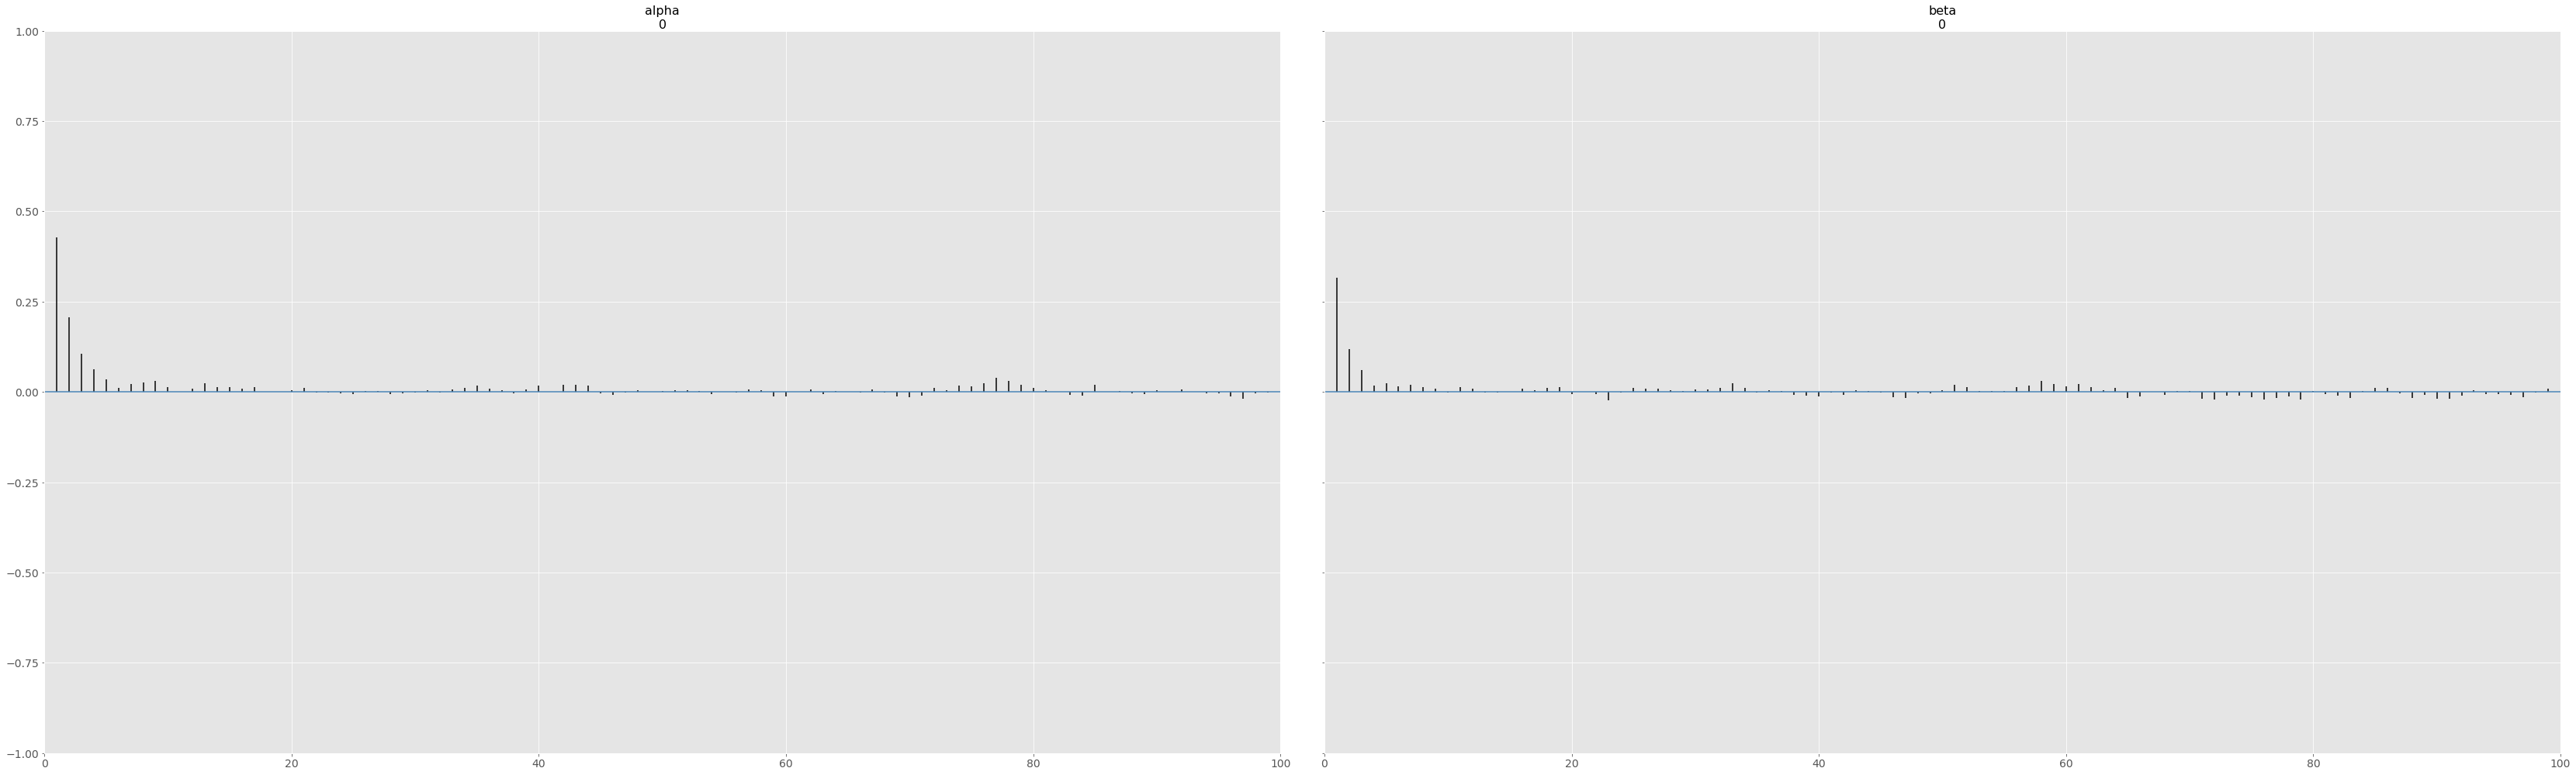

In [25]:
# Show the trace plot
figsize(20, 12)
pm.traceplot(trace, ['alpha', 'beta']);
# Show the autocorrelation plots
pm.autocorrplot(trace, ['alpha', 'beta']);